In [51]:
from google.colab import files

uploaded = files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [52]:
import pandas as pd
file = pd.read_csv('SalaryData_Train(1).csv')
file.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [54]:
X = file.iloc[:,:-1]
Y = file.iloc[:,-1]
X.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [55]:
X.isnull().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [63]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
SS = StandardScaler()
LR = LabelEncoder()
selected_columns_ss = ['age','educationno','capitalgain','capitalloss','hoursperweek']
selected_columns_lr = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']
X[selected_columns_ss] = SS.fit_transform(X[selected_columns_ss])
for columns in selected_columns_lr:
  X[columns] = LR.fit_transform(X[columns])
X.head()
Y = LR.fit_transform(Y)

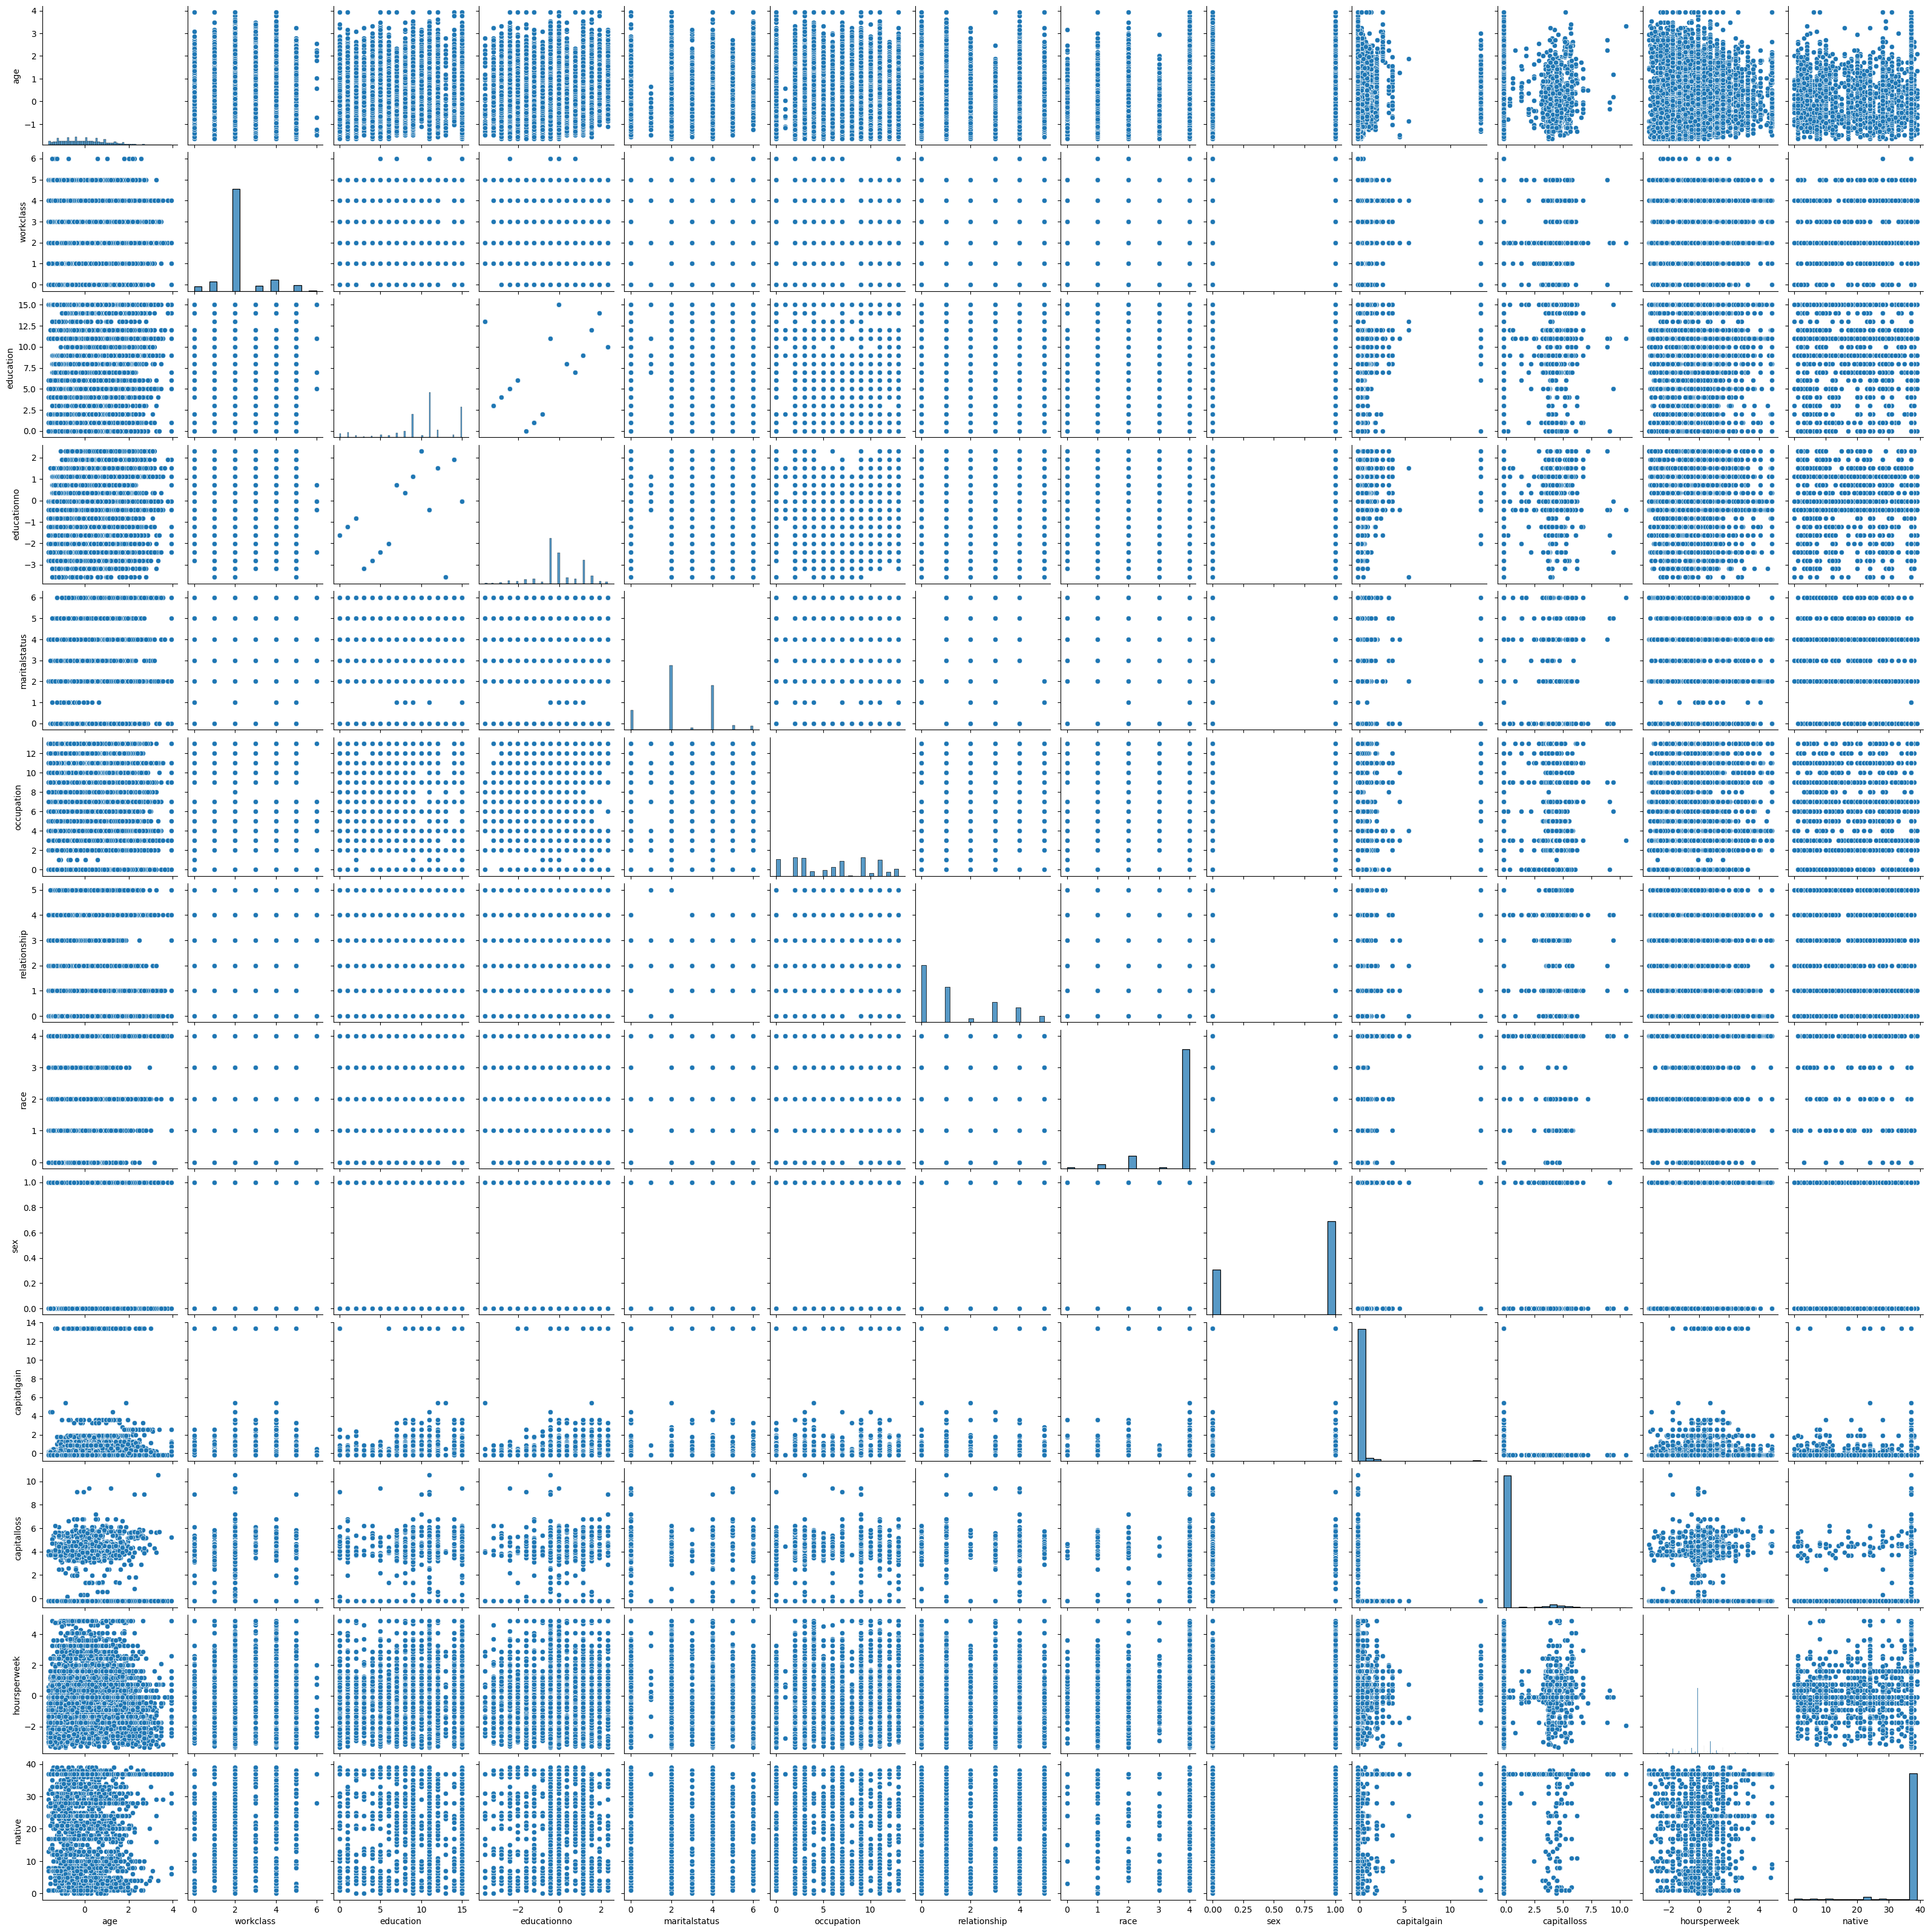

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(X)
plt.show()

<ipython-input-59-af4162943ea8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = file.corr()


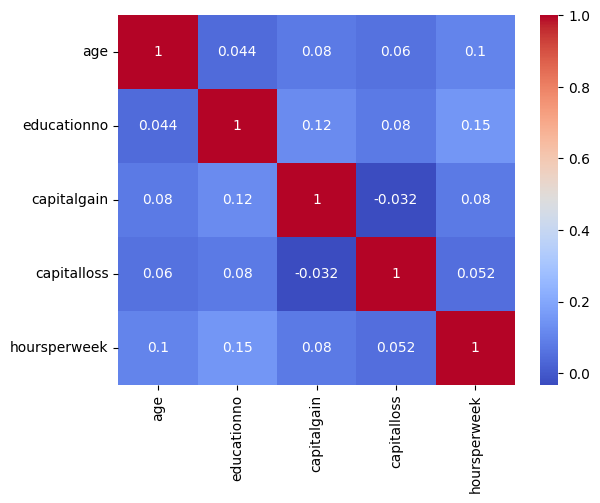

In [59]:
# Calculate correlation matrix
correlation_matrix = file.corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

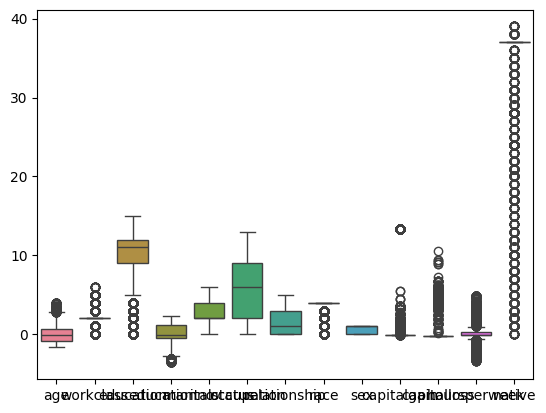

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.042779,5,9,1.128898,4,0,1,4,1,0.146085,-0.218508,-0.077735,37
1,0.880261,4,9,1.128898,2,3,0,4,1,-0.147447,-0.218508,-2.331495,37
2,-0.033356,2,11,-0.439733,0,5,1,4,1,-0.147447,-0.218508,-0.077735,37
3,1.108665,2,1,-1.224048,2,5,0,2,1,-0.147447,-0.218508,-0.077735,37
4,-0.794703,2,9,1.128898,2,9,5,2,0,-0.147447,-0.218508,-0.077735,4


In [60]:
import numpy as np

sns.boxplot(data=X)
plt.show()
X.head()

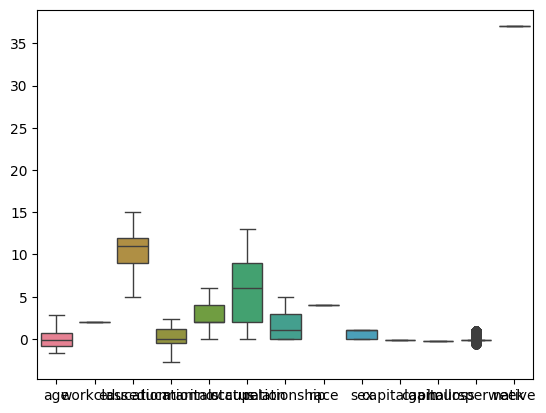

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.042779,2.0,9.0,1.128898,4.0,0.0,1.0,4.0,1.0,-0.147447,-0.218508,-0.077735,37.0
1,0.880261,2.0,9.0,1.128898,2.0,3.0,0.0,4.0,1.0,-0.147447,-0.218508,-0.077735,37.0
2,-0.033356,2.0,11.0,-0.439733,0.0,5.0,1.0,4.0,1.0,-0.147447,-0.218508,-0.077735,37.0
3,1.108665,2.0,11.0,-1.224048,2.0,5.0,0.0,4.0,1.0,-0.147447,-0.218508,-0.077735,37.0
4,-0.794703,2.0,9.0,1.128898,2.0,9.0,5.0,4.0,0.0,-0.147447,-0.218508,-0.077735,37.0


In [61]:
def replace_outliers_with_median(df, columns):
    for column in columns:
        median = df[column].median()  # Compute median from the original DataFrame
        IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
        lower_limit = df[column].quantile(0.25) - 1.5 * IQR
        upper_limit = df[column].quantile(0.75) + 1.5 * IQR
        df[column] = np.where(
            (df[column] < lower_limit) | (df[column] > upper_limit),
            median,  # Use the computed median
            df[column]
        )
    return df

X = replace_outliers_with_median(X, X.columns)
sns.boxplot(data=X)
plt.show()
X.head()

In [68]:
from sklearn.linear_model import Lasso, Ridge
ridge = Ridge(alpha=2.0)
ridge.fit(X, Y)
print("Ridge coefficients:", ridge.coef_)


lasso = Lasso(alpha=0.02)
lasso.fit(X, Y)
print("Lasso coefficients:", lasso.coef_)

Ridge coefficients: [ 0.07586834  0.         -0.00063323  0.13028456 -0.0253428   0.0012619
 -0.01851574  0.          0.12361942  0.          0.          0.03898306
  0.        ]
Lasso coefficients: [ 0.05627092  0.         -0.          0.1108313  -0.02273002  0.00101047
 -0.03709284  0.          0.0044833   0.          0.          0.02663409
  0.        ]


In [71]:
X = X.drop(['workclass','race','capitalgain','capitalloss','native'], axis=1)


In [72]:

X.head()

,age,education,educationno,maritalstatus,occupation,relationship,sex,hoursperweek
0,0.063738,4,1.149049,4,0,1,1,-0.336749
1,0.928133,4,1.149049,2,3,0,1,-0.336749
2,-0.014843,6,-0.477805,0,5,1,1,-0.336749
3,1.163877,6,-1.291232,2,5,0,1,-0.336749
4,-0.800656,4,1.149049,2,9,5,0,-0.336749


In [73]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        features  VIF Factor
0            age    1.094210
1      education    4.748846
2    educationno    1.034988
3  maritalstatus    3.704632
4     occupation    2.885967
5   relationship    2.317979
6            sex    3.252405
7   hoursperweek    1.049859


In [75]:
#Linear
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)
from sklearn.svm import SVC
df = SVC(kernel='linear',C=1.0)
df.fit(x_train,y_train)
y_pred_train = df.predict(x_train)
y_pred_test = df.predict(x_test)


In [76]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)


accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for train data:", accuracy_train)
print("Accuracy score for test data:", accuracy_test)


Accuracy score for train data: 0.7996400151572566
Accuracy score for test data: 0.8029616532213504


In [77]:
#poly
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)
from sklearn.svm import SVC
df = SVC(kernel='poly',degree = 2 )
df.fit(x_train,y_train)
y_pred_train = df.predict(x_train)
y_pred_test = df.predict(x_test)
accuracy_train = accuracy_score(y_train, y_pred_train)


accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for train data:", accuracy_train)
print("Accuracy score for test data:", accuracy_test)

Accuracy score for train data: 0.8057502841985601
Accuracy score for test data: 0.8063874461266438


In [78]:
#rbf
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)
from sklearn.svm import SVC
df = SVC(kernel='rbf',gamma= 2 )
df.fit(x_train,y_train)
y_pred_train = df.predict(x_train)
y_pred_test = df.predict(x_test)
accuracy_train = accuracy_score(y_train, y_pred_train)


accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for train data:", accuracy_train)
print("Accuracy score for test data:", accuracy_test)

Accuracy score for train data: 0.8688423645320197
Accuracy score for test data: 0.8218587689247431
